<ipython-input-14-2f7a4694fa29>:44: RuntimeWarning: invalid value encountered in arccos
  n_S_UK = arccos(2 * r_S_UK / r_H_UK - 1)
<ipython-input-14-2f7a4694fa29>:48: RuntimeWarning: invalid value encountered in arccos
  n_S_UK = arccos(2 * r_S_UK / r_H_UK - 1)
<ipython-input-14-2f7a4694fa29>:100: RuntimeWarning: divide by zero encountered in true_divide
  E_UC = (1 - 2 * M_UC / r_C_UC) / sqrt((1 - 3 * M_UC / r_C_UC))
<ipython-input-14-2f7a4694fa29>:110: RuntimeWarning: divide by zero encountered in true_divide
  return tau_U_UC(r_S_UC, r_H_UC, M_UC) / tau_C_UC(r_C_UC, M_UC)


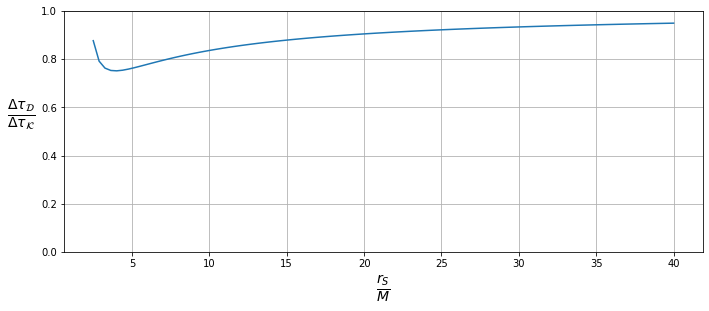

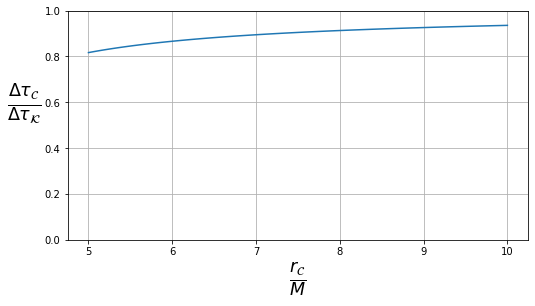

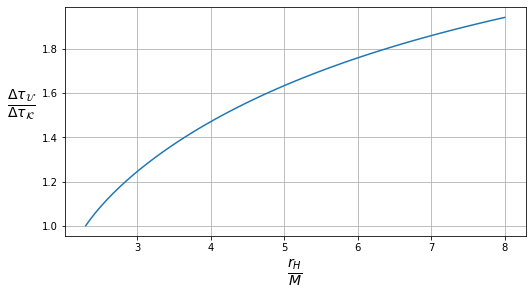

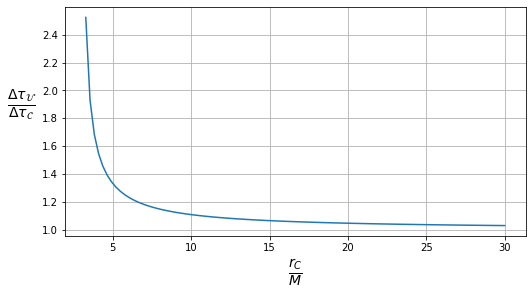

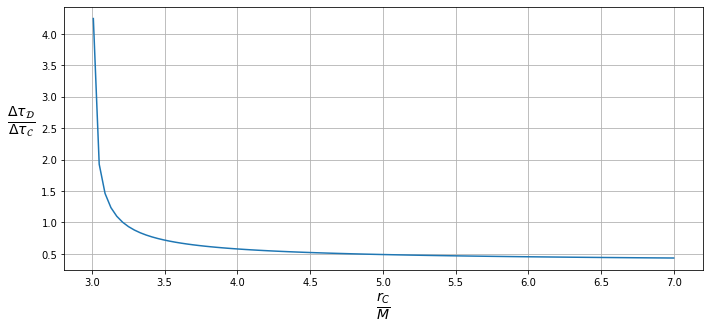

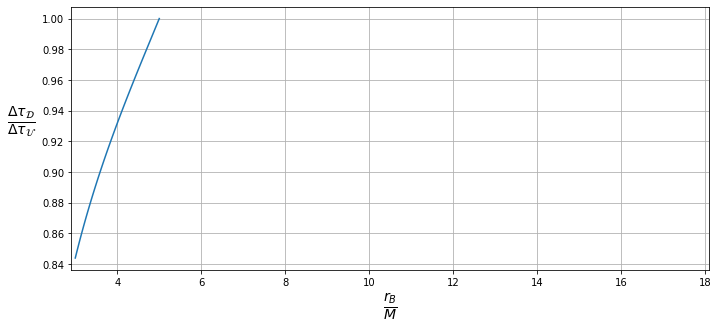

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep  1 12:00:15 2024

@author: Patrick Lemos
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
from numpy import arccos, sqrt, sin, log, tan, arcsin,pi
from scipy.optimize import fsolve

# Proper time functions for Killing and Downwards twins

def tau_D_DK(r_B_DK, r_S_DK, M_DK):
    n_S_DK = arccos(2 * r_B_DK / r_S_DK - 1)
    return sqrt(r_S_DK**3 / (2 * M_DK)) * (n_S_DK + sin(n_S_DK))

def tau_K_DK(r_B_DK, r_S_DK, M_DK):
    n_S_DK = arccos(2 * r_B_DK / r_S_DK - 1)
    E_H_DK = sqrt(1 - 2 * M_DK / r_S_DK)
    nh_DK = 2 * arcsin(E_H_DK)
    F_1_DK = (1/2) * (n_S_DK + sin(n_S_DK)) + n_S_DK * (1 - E_H_DK**2)
    F_2_DK = log((tan(nh_DK / 2) + tan(n_S_DK / 2)) / (tan(nh_DK / 2) - tan(n_S_DK / 2)))
    t_DK = 2 * E_H_DK * sqrt((r_S_DK**3 / (2 * M_DK))) * F_1_DK + 4 * M_DK * F_2_DK
    return sqrt(1 - 2 * M_DK / r_S_DK) * t_DK

# Proper time ratio for Killing and Downwards twins

def RDK_f_DK(r_B_DK, r_S_DK, M_DK):
    return tau_D_DK(r_B_DK, r_S_DK, M_DK) / tau_K_DK(r_B_DK, r_S_DK, M_DK)

# Proper time ratio for Killing and Circular twins

def RCK_f_CK(r_CK):
    return np.sqrt(((1 - 3 / r_CK) / (1 - 2 / r_CK)))

# Proper time functions for Killing and Upwards twins

def tau_U_UK(r_S_UK, r_H_UK, M_UK):
    n_S_UK = arccos(2 * r_S_UK / r_H_UK - 1)
    return sqrt(r_H_UK**3 / (2 * M_UK)) * (n_S_UK + sin(n_S_UK))

def tau_K_UK(r_S_UK, r_H_UK, M_UK):
    n_S_UK = arccos(2 * r_S_UK / r_H_UK - 1)
    E_H_UK = sqrt(1 - 2 * M_UK / r_H_UK)
    nh_UK = 2 * arcsin(E_H_UK)
    F_1_UK = (1/2) * (n_S_UK + sin(n_S_UK)) + n_S_UK * (1 - E_H_UK**2)
    F_2_UK = log((tan(nh_UK / 2) + tan(n_S_UK / 2)) / (tan(nh_UK / 2) - tan(n_S_UK / 2)))
    t_UK = 2 * E_H_UK * sqrt((r_H_UK**3 / (2 * M_UK))) * F_1_UK + 4 * M_UK * F_2_UK
    return sqrt(1 - 2 * M_UK / r_S_UK) * t_UK

# Proper time ratio for Killing and Upwards twins

def RUK_f_UK(r_S_UK, r_H_UK, M_UK):
    return tau_U_UK(r_S_UK, r_H_UK, M_UK) / tau_K_UK(r_S_UK, r_H_UK, M_UK)

# Some convenient functions for Upwards and Circular twins

def F1A_UC(r_H_UC):
    global r_C_value_UC
    M_UC = 1
    E_UC = sqrt(1 - 2 * M_UC / r_H_UC)
    n_UC = arccos(2 * r_C_value_UC / r_H_UC - 1)
    return (1 / 2) * (n_UC + sin(n_UC)) + n_UC * (1 - E_UC**2)

def F2A_UC(r_H_UC):
    global r_C_value_UC
    M_UC = 1
    E_UC = sqrt(1 - 2 * M_UC / r_H_UC)
    nh_UC = 2 * arcsin(E_UC)
    n_UC = ns_UC = arccos(2 * r_C_value_UC / r_H_UC - 1)
    return log((tan(nh_UC / 2) + tan(n_UC / 2)) / (tan(nh_UC / 2) - tan(n_UC / 2)))

def equation_UC(r_H_UC):
    global r_C_value_UC
    M_UC = 1
    E_UC = sqrt(1 - 2 * M_UC / r_H_UC)
    F1_UC = F1A_UC(r_H_UC)
    F2_UC = F2A_UC(r_H_UC)
    return 2 * E_UC * sqrt(r_H_UC**3 / (2 * M_UC)) * F1_UC + 4 * M_UC * F2_UC - 2 * pi * sqrt(r_C_value_UC**3 / M_UC)

# Coordinate times for Upwards and Circular twins

def tcc_UC(r_C_UC, M_UC):
    return 2 * pi * sqrt(r_C_UC**3 / M_UC)

def tcu_UC(r_H_UC, M_UC):
    E_UC = sqrt(1 - 2 * M_UC / r_H_UC)
    F1_UC = F1A_UC(r_H_UC)
    F2_UC = F2A_UC(r_H_UC)
    return 2 * E_UC * sqrt(r_H_UC**3 / (2 * M_UC)) * F1_UC + 4 * M_UC * F2_UC

# Proper times for Upwards and Circular twins

def tau_C_UC(r_C_UC, M_UC):
    E_UC = (1 - 2 * M_UC / r_C_UC) / sqrt((1 - 3 * M_UC / r_C_UC))
    return (1 - 2 * M_UC / r_C_UC) * tcc_UC(r_C_UC, M_UC) / E_UC

def tau_U_UC(r_S_UC, r_H_UC, M_UC):
    ns_UC = arccos(2 * r_S_UC / r_H_UC - 1)
    return sqrt(r_H_UC**3 / (2 * M_UC)) * (ns_UC + sin(ns_UC))

# Proper time ratio for Upwards and Circular twins

def RUC_f_UC(r_S_UC, r_C_UC, r_H_UC, M_UC):
    return tau_U_UC(r_S_UC, r_H_UC, M_UC) / tau_C_UC(r_C_UC, M_UC)

# Some convenient functions for Downwards and Circular twins

def F1A_DC(r_B_DC):
    global r_C_value_DC
    M_DC = 1
    E_DC = sqrt(1 - 2 * M_DC / r_C_value_DC)
    n_DC = arccos(2 * r_B_DC / r_C_value_DC - 1)
    nh_DC = 2 * arcsin(E_DC)
    return (1 / 2) * (n_DC + sin(n_DC)) + n_DC * (1 - E_DC**2)

def F2A_DC(r_B_DC):
    global r_C_value_DC
    M_DC = 1
    E_DC = sqrt(1 - 2 * M_DC / r_C_value_DC)
    nh_DC = 2 * arcsin(E_DC)
    n_DC = nb_DC = arccos(2 * r_B_DC / r_C_value_DC - 1)
    return log((tan(nh_DC / 2) + tan(n_DC / 2)) / (tan(nh_DC / 2) - tan(n_DC / 2)))

def equation_DC(r_B_DC):
    global r_C_value_DC
    M_DC = 1
    E_DC = sqrt(1 - 2 * M_DC / r_C_value_DC)
    F1_DC = F1A_DC(r_B_DC)
    F2_DC = F2A_DC(r_B_DC)
    return 2 * E_DC * sqrt(r_C_value_DC**3 / (2 * M_DC)) * F1_DC + 4 * M_DC * F2_DC - 2 * pi * sqrt(r_C_value_DC**3 / M_DC)

# Coordinate times for Downwards and Circular twins

def tcc_DC(r_C_DC, M_DC):
    return 2 * pi * sqrt(r_C_DC**3 / M_DC)

def tcd_DC(r_B_DC, r_C_DC, M_DC):
    E_DC = sqrt(1 - 2 * M_DC / r_C_DC)
    F1_DC = F1A_DC(r_B_DC)
    F2_DC = F2A_DC(r_B_DC)
    return 2 * E_DC * sqrt(r_C_DC**3 / (2 * M_DC)) * F1_DC + 4 * M_DC * F2_DC

# Proper times for Downwards and Circular twins

def tau_C_DC(r_C_DC, M_DC):
    E_DC = (1 - 2 * M_DC / r_C_DC) / sqrt((1 - 3 * M_DC / r_C_DC))
    return (1 - 2 * M_DC / r_C_DC) * tcc_DC(r_C_DC, M_DC) / E_DC

def tau_D_DC(r_C_DC, r_B_DC, M_DC):
    nb_DC = arccos(2 * r_B_DC / r_C_DC - 1)
    return sqrt(r_C_DC**3 / (2 * M_DC)) * (nb_DC + sin(nb_DC))

# Proper time ratio for Downwards and Circular twins

def RDC_f_DC(r_S_DC, r_C_DC, r_B_DC, M_DC):
    return tau_D_DC(r_C_DC, r_B_DC, M_DC) / tau_C_DC(r_C_DC, M_DC)

# Some convenient functions for Upwards and Downwards twins

def F1A_DU(n_DU, E_DU):
    return (1 / 2) * (n_DU + sin(n_DU)) + n_DU * (1 - E_DU**2)

def F2A_DU(n_DU, nh_DU):
    return log((tan(nh_DU / 2) + tan(n_DU / 2)) / (tan(nh_DU / 2) - tan(n_DU / 2)))

# Coordinate times for Upwards and Downwards twins

def tcu_DU(rh_DU, r_S_DU, M_DU=1):
    ns_DU = arccos(2 * r_S_DU / rh_DU - 1)
    Eh_DU = sqrt(1 - 2 * M_DU / rh_DU)
    nh_DU = 2 * arcsin(Eh_DU)
    F1_DU = F1A_DU(ns_DU, Eh_DU)
    F2_DU = F2A_DU(ns_DU, nh_DU)
    return 2 * Eh_DU * sqrt(rh_DU**3 / (2 * M_DU)) * F1_DU + 4 * M_DU * F2_DU

def tcd_DU(rh_DU, r_B_value_DU, r_S_DU, M_DU=1):
    nb_DU = arccos(2 * r_B_value_DU / r_S_DU - 1)
    Es_DU = sqrt(1 - 2 * M_DU / r_S_DU)
    nh_DU = 2 * arcsin(Es_DU)
    F1_DU = F1A_DU(nb_DU, Es_DU)
    F2_DU = F2A_DU(nb_DU, nh_DU)
    return 2 * Es_DU * sqrt(r_S_DU**3 / (2 * M_DU)) * F1_DU + 4 * M_DU * F2_DU

# Another convenient function

def equation_DU(rh_DU, r_B_value_DU, r_S_DU):
    return tcd_DU(rh_DU, r_B_value_DU, r_S_DU) - tcu_DU(rh_DU, r_S_DU)

# Proper times for Upwards and Downwards twins

def tau_D_DU(r_B_DU, r_S_DU, M_DU=1):
    nb_DU = arccos(2 * r_B_DU / r_S_DU - 1)
    return sqrt(r_S_DU**3 / (2 * M_DU)) * (nb_DU + sin(nb_DU))

def tau_U_DU(r_S_DU, r_H_DU, M_DU=1):
    ns_DU = arccos(2 * r_S_DU / r_H_DU - 1)
    return sqrt(r_H_DU**3 / (2 * M_DU)) * (ns_DU + sin(ns_DU))

# Proper time ratio for Upwards and Downwards twins

def RDU_f_DU(r_B_DU, r_S_DU, r_H_DU, M_DU=1):
    return tau_D_DU(r_B_DU, r_S_DU, M_DU) / tau_U_DU(r_S_DU, r_H_DU, M_DU)

# Update functions

def update_DK(event=None):
    a_DK = slider_DK.get()
    r_S_i_DK = float(entry_i_DK.get())
    r_S_f_DK = float(entry_f_DK.get())
    r_S_values_DK = np.linspace(r_S_i_DK, r_S_f_DK, 100)
    RDK_DK = RDK_f_DK(a_DK, r_S_values_DK, 1)
    line_DK.set_xdata(r_S_values_DK)
    line_DK.set_ydata(RDK_DK)
    ax_DK.set_xlim([r_S_i_DK, r_S_f_DK])
    ax_DK.set_ylim([0, 1])
    canvas_DK.draw()

def update_CK(event=None):
    r_CM_i_CK = float(entry_i_CK.get())
    r_CM_f_CK = float(entry_f_CK.get())
    r_CM_values_CK = np.linspace(r_CM_i_CK, r_CM_f_CK, 100)
    RCK_CK = RCK_f_CK(r_CM_values_CK)
    line_CK.set_xdata(r_CM_values_CK)
    line_CK.set_ydata(RCK_CK)
    ax_CK.set_xlim([r_CM_i_CK, r_CM_f_CK])
    ax_CK.set_ylim([0, 1])
    canvas_CK.draw()

def update_UK(event=None):
    a_UK = slider_UK.get()
    r_H_i_UK = float(entry_i_UK.get())
    r_H_f_UK = float(entry_f_UK.get())
    r_H_values_UK = np.linspace(r_H_i_UK, r_H_f_UK, 100)
    RUK_UK = RUK_f_UK(a_UK, r_H_values_UK, 1)
    line_UK.set_xdata(r_H_values_UK)
    line_UK.set_ydata(RUK_UK)
    ax_UK.set_xlim([r_H_i_UK, r_H_f_UK])
    # ax_UK.set_ylim([0,1])
    canvas_UK.draw()

def update_UC(event=None):
    r_C_i_UC = float(entry_i_UC.get())
    r_C_f_UC = float(entry_f_UC.get())
    r_C_values_UC = np.linspace(r_C_i_UC, r_C_f_UC, 100)
    r_H_values_UC = []
    for r_C_value_UC in r_C_values_UC:
        zero_UC = fsolve(equation_UC, r_C_value_UC * 3)
        r_H_values_UC.append(zero_UC[0])
    r_H_values_UC = np.array(r_H_values_UC)
    r_S_values_UC = r_C_values_UC
    RUC_init_UC = RUC_f_UC(r_S_values_UC, r_C_values_UC, r_H_values_UC, M_value_UC)
    ax_UC.set_xlim([r_C_i_UC, r_C_f_UC])
    line_UC.set_xdata(r_C_values_UC)
    line_UC.set_ydata(RUC_init_UC)
    # ax_UC.set_ylim([0,1])
    canvas_UC.draw()

def update_DC(event=None):
    r_C_i_DC = float(entry_i_DC.get())
    r_C_f_DC = float(entry_f_DC.get())
    r_C_values_DC = np.linspace(r_C_i_DC, r_C_f_DC, 100)
    r_B_values_DC = []
    for r_C_value_DC in r_C_values_DC:
        zero = fsolve(equation_DC, 2 + 1e-10)
        r_B_values_DC.append(zero_DC[0])
    r_B_values_DC = np.array(r_B_values_DC)
    r_S_values_DC = r_C_values_DC
    RDC_init_DC = RDC_f_DC(r_S_values_DC, r_C_values_DC, r_B_values_DC, M_value_DC)
    ax_DC.set_xlim([r_C_i_DC, r_C_f_DC])
    line_DC.set_xdata(r_C_values_DC)
    line_DC.set_ydata(RDC_init_DC)
    # ax_DC.set_ylim([0,1])
    canvas_DC.draw()

def update_DU(event=None):
    r_B_i_DU = float(entry_i_DU.get())
    r_S_DU = float(entry_f_DU.get())
    r_B_f_DU = r_S_DU - 1e-5
    r_B_values_DU = np.linspace(r_B_i_DU, r_B_f_DU, 100)
    r_H_values_DU = []
    for r_B_value_DU in r_B_values_DU:
        zero_DU = fsolve(equation_DU, r_S_DU, args=(r_B_value_DU, r_S_DU))
        r_H_values_DU.append(zero_DU[0])
    r_H_values_DU = np.array(r_H_values_DU)
    RDU_DU = RDU_f_DU(r_B_values_DU, r_S_DU, r_H_values_DU, M_value_DU)
    ax_DU.set_xlim([2.9, 18.1]) #ax_DU.set_xlim([r_B_i_DU, r_B_f_DU])
    line_DU.set_xdata(r_B_values_DU)
    line_DU.set_ydata(RDU_DU)
    canvas_DU.draw_idle()

# Initializing parameters of tab DK

r_S_i_init_DK, r_S_f_init_DK = 2.5, 40
r_S_values_DK = np.linspace(r_S_i_init_DK, r_S_f_init_DK, 100)
M_value_DK = 1 
r_B_init_DK = 2.3
RDK_init_DK = RDK_f_DK(r_B_init_DK, r_S_values_DK, M_value_DK)

# Initializing parameters of tab CK

r_CM_i_init_CK = 5
r_CM_f_init_CK = 10
r_CM_values_CK = np.linspace(r_CM_i_init_CK, r_CM_f_init_CK, 100)
RCK_init_CK = RCK_f_CK(r_CM_values_CK)

# Initializing parameters of tab UK

r_H_i_init_UK, r_H_f_init_UK = 2, 8
r_H_values_UK = np.linspace(r_H_i_init_UK, r_H_f_init_UK, 100)
M_value_UK = 1
r_S_init_UK = 2.3
RUK_init_UK = RUK_f_UK(r_S_init_UK, r_H_values_UK, M_value_UK)

# Initializing parameters of tab UC

M_value_UC = 1
r_H_values_UC = []
r_C_i_init_UC, r_C_f_init_UC = 3, 30
r_C_values_UC = np.linspace(r_C_i_init_UC, r_C_f_init_UC, 100)
# Calculating r_H
for r_C_value_UC in r_C_values_UC:
    zero_UC = fsolve(equation_UC, r_C_value_UC * 3)
    r_H_values_UC.append(zero_UC[0])
r_H_values_UC = np.array(r_H_values_UC)
r_S_values_UC = r_C_values_UC
RUC_init_UC = RUC_f_UC(r_S_values_UC, r_C_values_UC, r_H_values_UC, M_value_UC)


# Initializing parameters of tab DC

M_value_DC = 1
r_B_values_DC = []
r_C_i_init_DC, r_C_f_init_DC = 3.01, 7
r_C_values_DC = np.linspace(r_C_i_init_DC, r_C_f_init_DC, 100)
# Calculating r_B
for r_C_value_DC in r_C_values_DC:
    zero_DC = fsolve(equation_DC, 2 + 1e-10)
    r_B_values_DC.append(zero_DC[0])
r_B_values_DC = np.array(r_B_values_DC)
r_S_values_DC = r_C_values_DC
RDC_init_DC = RDC_f_DC(r_S_values_DC, r_C_values_DC, r_B_values_DC, M_value_DC)

# Initializing parameters of tab DU
M_value_DU = 1
r_S_DU = r_S_init_DU = 5
r_B_i_init_DU, r_B_f_init_DU = 3, r_S_init_DU - 1e-5
r_B_values_DU = np.linspace(r_B_i_init_DU, r_B_f_init_DU, 100)
# Calculating r_H
r_H_values_DU = []
for r_B_value_DU in r_B_values_DU:
    zero_DU = fsolve(equation_DU, r_S_DU, args=(r_B_value_DU, r_S_DU))
    r_H_values_DU.append(zero_DU[0])
r_H_values_DU = np.array(r_H_values_DU)
RDU_init_DU = RDU_f_DU(r_B_values_DU, r_S_init_DU, r_H_values_DU, M_value_DU)

# Creation of the main window

root = tk.Tk()
root.title("Proper time ratios")

# Defining window's geometry (width x height)

root.geometry("800x600")

# Allowing resizing of the window

root.resizable(True, True)

# Creating the widget of tabs

notebook = ttk.Notebook(root)
notebook.pack(expand=1, fill="both")

# Creating tabs

tab_DK = ttk.Frame(notebook)
tab_CK = ttk.Frame(notebook)
tab_UK = ttk.Frame(notebook)
tab_UC = ttk.Frame(notebook)
tab_DC = ttk.Frame(notebook)
tab_DU = ttk.Frame(notebook)

# Adding tabs to "notebook"

notebook.add(tab_DK, text="Observers D and K ")
notebook.add(tab_CK, text="Observers C and K")
notebook.add(tab_UK, text="Observers U and K")
notebook.add(tab_UC, text="Observers U and C")
notebook.add(tab_DC, text="Observers D and C")
notebook.add(tab_DU, text="Observers D and U")

# Plot DK

fig_DK, ax_DK = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.35)
line_DK, = ax_DK.plot(r_S_values_DK, RDK_init_DK)
ax_DK.set_ylabel('$\\frac{\Delta \\tau_{\\mathcal{D}} }{\Delta \\tau_{\\mathcal{K}}}$', labelpad=20, rotation='horizontal', size=20)
ax_DK.set_xlabel('$\\frac{r_S}{M}$', size=20)
ax_DK.grid(True)
ax_DK.set_ylim([0, 1])

canvas_DK = FigureCanvasTkAgg(fig_DK, master=tab_DK)
canvas_DK.draw()
canvas_DK.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Entry controls for tab DK

frame_controls_DK = tk.Frame(tab_DK)
frame_controls_DK.pack(side=tk.BOTTOM)

tk.Label(frame_controls_DK, text="r_B / M:").grid(row=0, column=0)
slider_DK = tk.Scale(frame_controls_DK, from_=2.3, to=10.0, orient=tk.HORIZONTAL, resolution=0.1, command=update_DK)
slider_DK.set(r_B_init_DK)
slider_DK.grid(row=0, column=1)

tk.Label(frame_controls_DK, text="r_S / M (initial):").grid(row=1, column=0)
entry_i_DK = tk.Entry(frame_controls_DK)
entry_i_DK.insert(0, str(r_S_i_init_DK))
entry_i_DK.grid(row=1, column=1)

tk.Label(frame_controls_DK, text="r_S / M (final):").grid(row=2, column=0)
entry_f_DK = tk.Entry(frame_controls_DK)
entry_f_DK.insert(0, str(r_S_f_init_DK))
entry_f_DK.grid(row=2, column=1)

btn_update_DK = tk.Button(frame_controls_DK, text="Refresh", command=update_DK)
btn_update_DK.grid(row=3, columnspan=2)

# Plot CK

fig_CK, ax_CK = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.35)
line_CK, = ax_CK.plot(r_CM_values_CK, RCK_init_CK)
ax_CK.set_ylabel('$\\frac{\\Delta \\tau_{\\mathcal{C}}}{\\Delta \\tau_{\\mathcal{K}}}$', labelpad=20, rotation='horizontal', size=25)
ax_CK.set_xlabel('$\\frac{r_{\\mathcal{C}}}{M}$', size=25)
ax_CK.grid(True)
ax_CK.set_ylim([0, 1])

# Entry controls for tab CK

canvas_CK = FigureCanvasTkAgg(fig_CK, master=tab_CK)
canvas_CK.draw()
canvas_CK.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

frame_controls_CK = tk.Frame(tab_CK)
frame_controls_CK.pack(side=tk.BOTTOM)

tk.Label(frame_controls_CK, text='r_C/M (initial)').grid(row=1, column=0)
entry_i_CK = tk.Entry(frame_controls_CK)
entry_i_CK.insert(0, str(r_CM_i_init_CK))
entry_i_CK.grid(row=1, column=1)

tk.Label(frame_controls_CK, text='r_C/M (final)').grid(row=2, column=0)
entry_f_CK = tk.Entry(frame_controls_CK)
entry_f_CK.insert(0, str(r_CM_f_init_CK))
entry_f_CK.grid(row=2, column=1)

btn_update_CK = tk.Button(frame_controls_CK, text="Refresh", command=update_CK)
btn_update_CK.grid(row=3, columnspan=2)


# Plot UK

fig_UK, ax_UK = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.35)
line_UK, = ax_UK.plot(r_H_values_UK, RUK_init_UK)
ax_UK.set_ylabel('$\\frac{\\Delta \\tau_{\\mathcal{U}} }{\\Delta \\tau_{\\mathcal{K}}}$', labelpad=20, rotation='horizontal', size=20)
ax_UK.set_xlabel('$\\frac{r_H}{M}$', size=20)
ax_UK.grid(True)
# ax_UK.set_ylim([0, 1]

canvas_UK = FigureCanvasTkAgg(fig_UK, master=tab_UK)
canvas_UK.draw()
canvas_UK.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Entry controls for tab UK

frame_controls_UK = tk.Frame(tab_UK)
frame_controls_UK.pack(side=tk.BOTTOM)

tk.Label(frame_controls_UK, text='r_S/M').grid(row=0, column=0)
slider_UK = tk.Scale(frame_controls_UK, from_=2.3, to=10.0, orient=tk.HORIZONTAL, resolution=0.1, command=update_UK)
slider_UK.set(r_S_init_UK)
slider_UK.grid(row=0, column=1)

tk.Label(frame_controls_UK, text='r_H/M (initial)').grid(row=1, column=0)
entry_i_UK = tk.Entry(frame_controls_UK)
entry_i_UK.insert(0,str(r_H_i_init_UK))
entry_i_UK.grid(row=1, column=1)

tk.Label(frame_controls_UK, text='r_H/M (final)').grid(row=2, column=0)
entry_f_UK = tk.Entry(frame_controls_UK)
entry_f_UK.insert(0, str(r_H_f_init_UK))
entry_f_UK.grid(row=2, column=1)

btn_update_UK = tk.Button(frame_controls_UK, text="Refresh", command=update_UK)
btn_update_UK.grid(row=3, columnspan=2)

# Plot UC

fig_UC, ax_UC = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.35)
line_UC, = ax_UC.plot(r_C_values_UC, RUC_init_UC)
ax_UC.set_ylabel('$\\frac{\Delta \\tau_{\mathcal{U}} }{\Delta \\tau_{\mathcal{C}}}$', labelpad=20, rotation='horizontal', size=20)
ax_UC.set_xlabel('$\\frac{r_C}{M}$', size=20)
ax_UC.grid(True)
# ax_UC.set_ylim([0, 1])

# Entry controls for tab UC

canvas_UC = FigureCanvasTkAgg(fig_UC, master=tab_UC)
canvas_UC.draw()
canvas_UC.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

frame_controls_UC = tk.Frame(tab_UC)
frame_controls_UC.pack(side=tk.BOTTOM)

tk.Label(frame_controls_UC, text='r_C/M (initial)').grid(row=1, column=0)
entry_i_UC = tk.Entry(frame_controls_UC)
entry_i_UC.insert(0, str(r_C_i_init_UC))
entry_i_UC.grid(row=1, column=1)

tk.Label(frame_controls_UC, text='r_C/M(final)').grid(row=2, column=0)
entry_f_UC = tk.Entry(frame_controls_UC)
entry_f_UC.insert(0, str(r_C_f_init_UC))
entry_f_UC.grid(row=2, column=1)

btn_update_UC = tk.Button(frame_controls_UC, text="Refresh", command=update_UC)
btn_update_UC.grid(row=3, columnspan=2)

# Plot DC

fig_DC, ax_DC = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.35)
line_DC, = ax_DC.plot(r_C_values_DC, RDC_init_DC)
ax_DC.set_ylabel('$\\frac{\Delta \\tau_{\mathcal{D}} }{\Delta \\tau_{\mathcal{C}}}$', labelpad=20, rotation='horizontal', size=20)
ax_DC.set_xlabel('$\\frac{r_C}{M}$', size=20)
ax_DC.grid(True)
# ax_DC.set_ylim([0.5, 4])

# Entry controls for tab DC

canvas_DC = FigureCanvasTkAgg(fig_DC, master=tab_DC)
canvas_DC.draw()
canvas_DC.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

frame_controls_DC = tk.Frame(tab_DC)
frame_controls_DC.pack(side=tk.BOTTOM)

tk.Label(frame_controls_DC, text='r_C/M (initial)').grid(row=1, column=0)
entry_i_DC = tk.Entry(frame_controls_DC)
entry_i_DC.insert(0,str(r_C_i_init_DC))
entry_i_DC.grid(row=1, column=1)

tk.Label(frame_controls_DC, text='r_C/M (final)').grid(row=2, column=0)
entry_f_DC = tk.Entry(frame_controls_DC)
entry_f_DC.insert(0,str(r_C_f_init_DC))
entry_f_DC.grid(row=2, column=1)

btn_update_DC = tk.Button(frame_controls_DC, text="Refresh", command=update_DC)
btn_update_DC.grid(row=3, columnspan=2)

# Plot DU

fig_DU, ax_DU = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.35)
line_DU, = ax_DU.plot(r_B_values_DU, RDU_init_DU)
ax_DU.set_ylabel('$\\frac{\Delta \\tau_{\mathcal{D}} }{\Delta \\tau_{\mathcal{U}}}$', labelpad=20, rotation='horizontal', size=20)
ax_DU.set_xlabel('$\\frac{r_B}{M}$', size=20)
ax_DU.grid(True)
ax_DU.set_xlim([2.9, 18.1])

# Entry controls for tab DU

canvas_DU = FigureCanvasTkAgg(fig_DU, master=tab_DU)
canvas_DU.draw()
canvas_DU.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

frame_controls_DU = tk.Frame(tab_DU)
frame_controls_DU.pack(side=tk.BOTTOM)

tk.Label(frame_controls_DU, text='r_B/M (initial)').grid(row=1, column=0)
entry_i_DU = tk.Entry(frame_controls_DU)
entry_i_DU.insert(0,str(r_B_i_init_DU))
entry_i_DU.grid(row=1, column=1)

tk.Label(frame_controls_DU, text= 'r_S/M',).grid(row=2, column=0)
entry_f_DU = tk.Entry(frame_controls_DU)
entry_f_DU.insert(0,str(r_S_init_DU))
entry_f_DU.grid(row=2, column=1)

btn_update_DU = tk.Button(frame_controls_DU, text="Refresh", command=update_DU)
btn_update_DU.grid(row=3, columnspan=2)

# Looping

root.mainloop()
